In [30]:
import sqc
import numpy as np
from exercises import qft
import matplotlib.pyplot as plt

# Phase estimation

In [37]:
def phaseEstimate(op,xbits,cuj):
    N=len(xbits)
    for i in reversed(range(N)):
        op=op.H(xbits[i])
        op=cuj(xbits[i],2**i,op)
    op=qft(op,mask=xbits,inverse=True)
    return op

# Simple U = {{ Exp[I 2pi phi], 0}, { 0, Exp[-I 2pi phi] }}, always acting on LSB
def CU(i,k,op,phi): # i is control qubit, k is power
    return op.Rz(0,2.*np.pi*phi*k).CNOT(i,0).Rz(0,-2.*np.pi*phi*k).CNOT(i,0)

def measure(Nxbits,ph,Nmeasure):
    Nbits=Nxbits+1
    xbits=list(range(1,Nbits))
    
    st0=sqc.state(Nbits,basis=["|%g>|%d>" % ( (i//2) / 2**Nxbits,i%2) for i in range(2**Nbits)])
    print("Initial = 0\n",st0)

    st1=phaseEstimate(sqc.operator(Nbits).H(0),xbits,
                    lambda i,k,op: CU(i,k,op,ph))*st0

    if Nmeasure == 0:
        print("State after phaseEstimate\n",st1)
    else:
        res=sqc.sample(st1,Nmeasure,mask=xbits)
        
        plt.bar([ (x//2) / 2**Nxbits for x in res.keys() ],res.values(),width=0.01)
        plt.xlabel('phi')
        plt.xlim(0,1)
        plt.ylabel('count')
        plt.show()
        
    


In [38]:
measure(4,0.25,0)

Initial = 0
    1 * |0>|0>
State after phaseEstimate
    0.707107 * |0.25>|1>
 + 0.707107 * |0.75>|0>


Initial = 0
    1 * |0>|0>


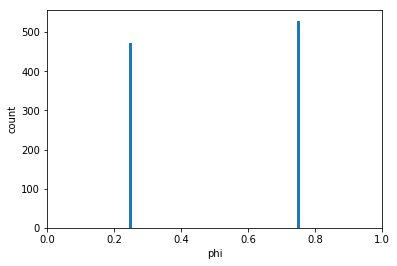

In [40]:
measure(4,0.25,1000)

Initial = 0
    1 * |0>|0>


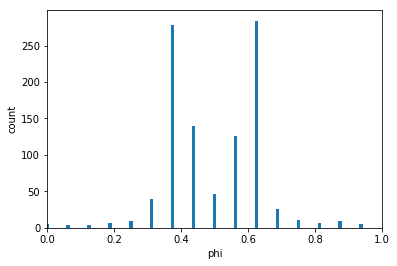

In [41]:
measure(4,0.4,1000)

Initial = 0
    1 * |0>|0>


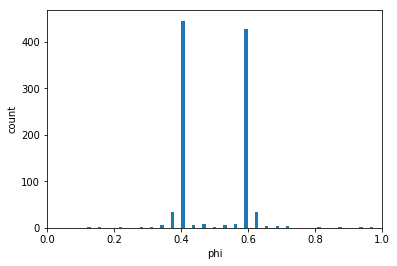

In [42]:
measure(5,0.4,1000)

Initial = 0
    1 * |0>|0>


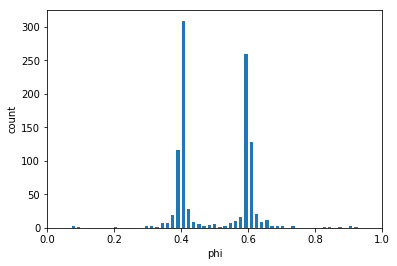

In [43]:
measure(6,0.4,1000)

Initial = 0
    1 * |0>|0>


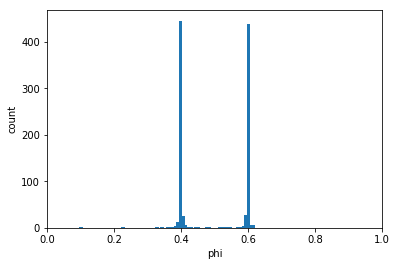

In [44]:
measure(7,0.4,1000)